## Assignment 01

### Linearregression impact on outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
x = np.arange(10) 
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00,
              -8.13, -11.73, -16.08, -19.95, -24.03])

In [3]:
X=x.reshape(-1, 1) 

In [4]:

model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Score",model.score(X,y))

Coefficients: [-3.55727273]
Intercept: 3.916727272727277
Score 0.35659896841019867


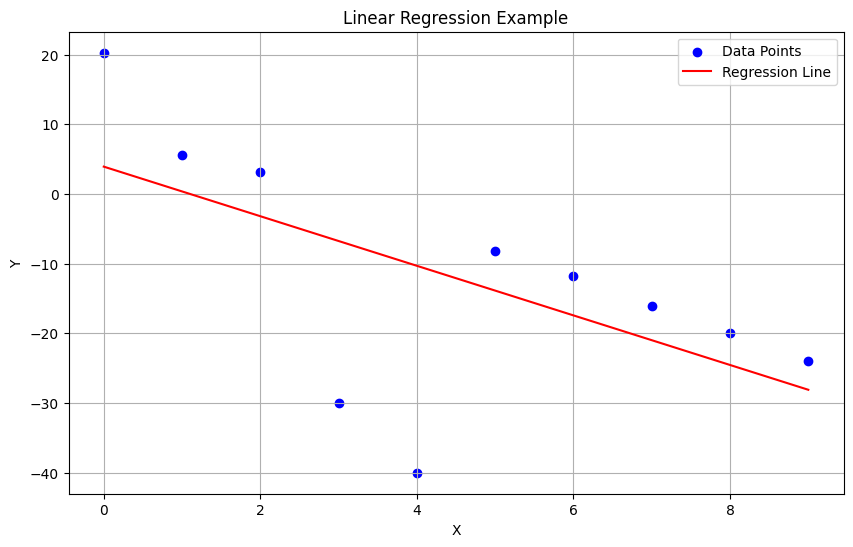

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [6]:
def loss_function(ytrue, y_pred,beta):
    error= (ytrue - y_pred)**2
    loss=error/(error + beta**2)
    return loss
    

## Model 1

In [7]:
y_true1=y
y_pred1=-4*x + 12

## Model 2

In [8]:
y_true2 = y
y_pred2=-3.55*x + 3.91


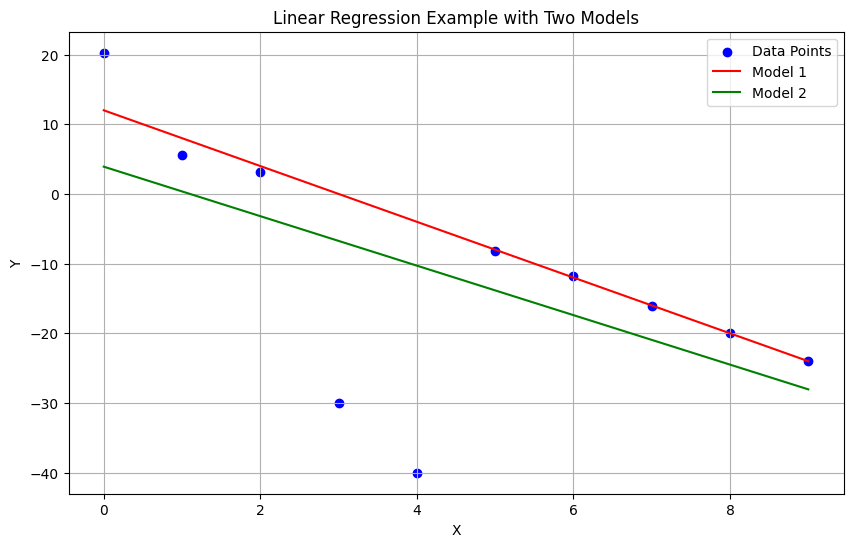

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred1 , color='red', label='Model 1')
plt.plot(x, y_pred2, color='green', label='Model 2')
plt.title('Linear Regression Example with Two Models')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [10]:
Beta=[1, 1e-6, 1000]


In [11]:
for i in Beta:
    loss1 = loss_function(y_true1, y_pred1, i)
    print(f"Model 1 Loss with beta=>{i}: {loss1.mean()}")
    loss2 = loss_function(y_true2, y_pred2, i)
    print(f"Model 2 Loss with beta=>{i}: {loss2.mean()}")


Model 1 Loss with beta=>1: 0.435416262490386
Model 2 Loss with beta=>1: 0.9728470518681676
Model 1 Loss with beta=>1e-06: 0.9999999998258206
Model 2 Loss with beta=>1e-06: 0.9999999999999718
Model 1 Loss with beta=>1000: 0.0002268287498440988
Model 2 Loss with beta=>1000: 0.00018824684654645654


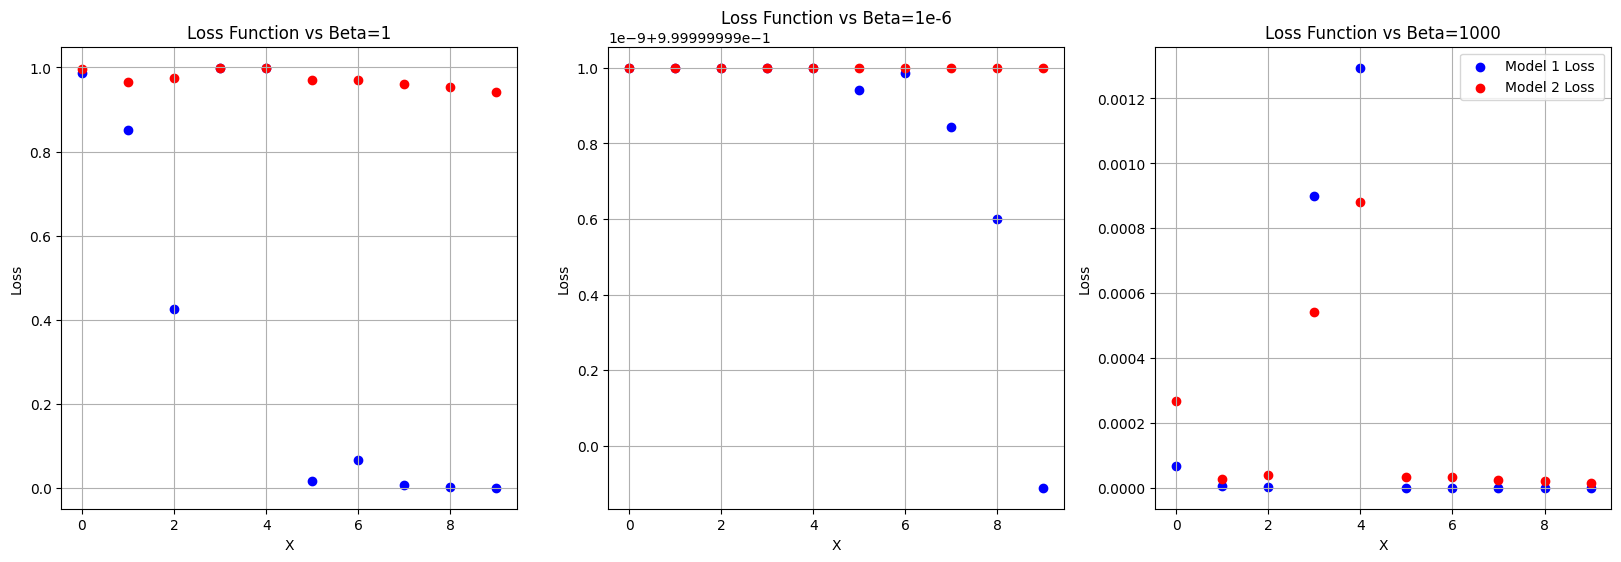

In [12]:
loss1=[loss_function(y_true1, y_pred1, i) for i in Beta]
loss2=[loss_function(y_true2, y_pred2, i) for i in Beta]

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(x, loss1[0], label='Model 1 Loss ', color='blue')
plt.scatter(x, loss2[0], label='Model 2 Loss', color='red')
plt.title('Loss Function vs Beta=1')
plt.xlabel('X')
plt.ylabel('Loss')
plt.grid()
plt.subplot(1, 3, 2)
plt.scatter(x, loss1[1], label='Model 1 Loss ', color='blue')
plt.scatter(x, loss2[1], label='Model 2 Loss', color='red')
plt.title('Loss Function vs Beta=1e-6')
plt.xlabel('X')
plt.ylabel('Loss')
plt.grid()
plt.subplot(1, 3, 3)
plt.scatter(x, loss1[2], label='Model 1 Loss ', color='blue')
plt.scatter(x, loss2[2], label='Model 2 Loss', color='red')
plt.title('Loss Function vs Beta=1000')
plt.xlabel('X')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [13]:
beta=np.linspace(0, 1, 10000)
loss_model1=[loss_function(y_true1, y_pred1, i).mean() for i in beta]
loss_model2=[loss_function(y_true2, y_pred2, i).mean() for i in beta]

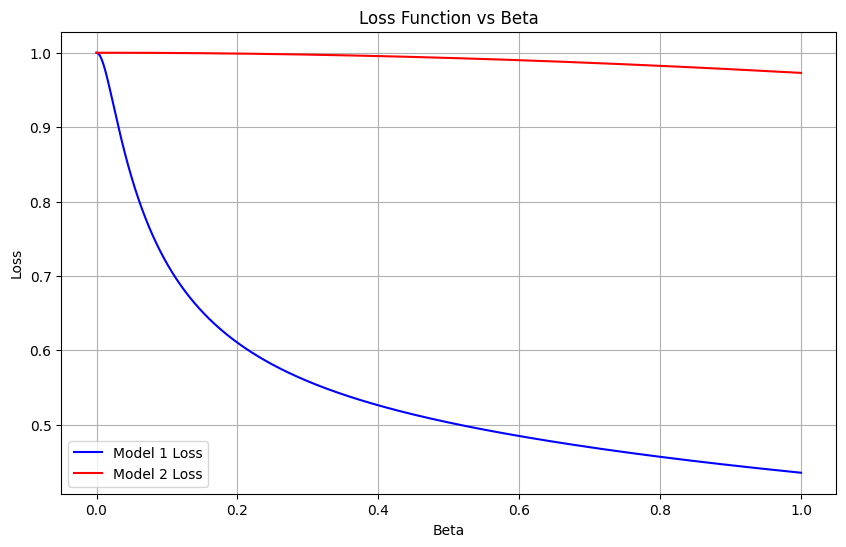

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(beta, loss_model1, label='Model 1 Loss', color='blue')
plt.plot(beta, loss_model2, label='Model 2 Loss', color='red')
plt.title('Loss Function vs Beta')
plt.xlabel('Beta')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Q(2)

In [15]:
y_true = np.ones(13)
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [16]:
MSE=(y_true-y_pred)**2


In [17]:
ep=1e-7
y_pred1=np.clip(y_pred,ep,1-ep)
BCE=-(y_true*np.log(y_pred1) + (1-y_true)*np.log(1-y_pred1)).round(6)


In [18]:
import pandas as pd
df= pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'MSE': MSE,
    'BCE': BCE
})

print(df.to_string(index=False))
df.to_csv('asigment01.csv', index=False)

 y_true  y_pred      MSE      BCE
    1.0   0.005 0.990025 5.298317
    1.0   0.010 0.980100 4.605170
    1.0   0.050 0.902500 2.995732
    1.0   0.100 0.810000 2.302585
    1.0   0.200 0.640000 1.609438
    1.0   0.300 0.490000 1.203973
    1.0   0.400 0.360000 0.916291
    1.0   0.500 0.250000 0.693147
    1.0   0.600 0.160000 0.510826
    1.0   0.700 0.090000 0.356675
    1.0   0.800 0.040000 0.223144
    1.0   0.900 0.010000 0.105361
    1.0   1.000 0.000000 0.000000


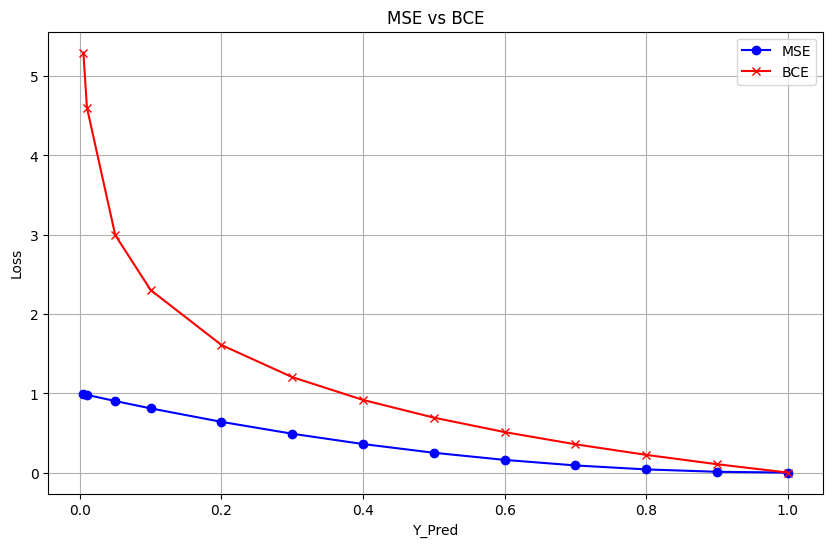

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred, MSE, label='MSE', marker='o', color='blue')
plt.plot(y_pred, BCE, label='BCE', marker='x', color='red')
plt.title('MSE vs BCE')
plt.xlabel('Y_Pred')
plt.ylabel('Loss')
plt.legend()
plt.grid()



## Q(3) Data Pre Processing

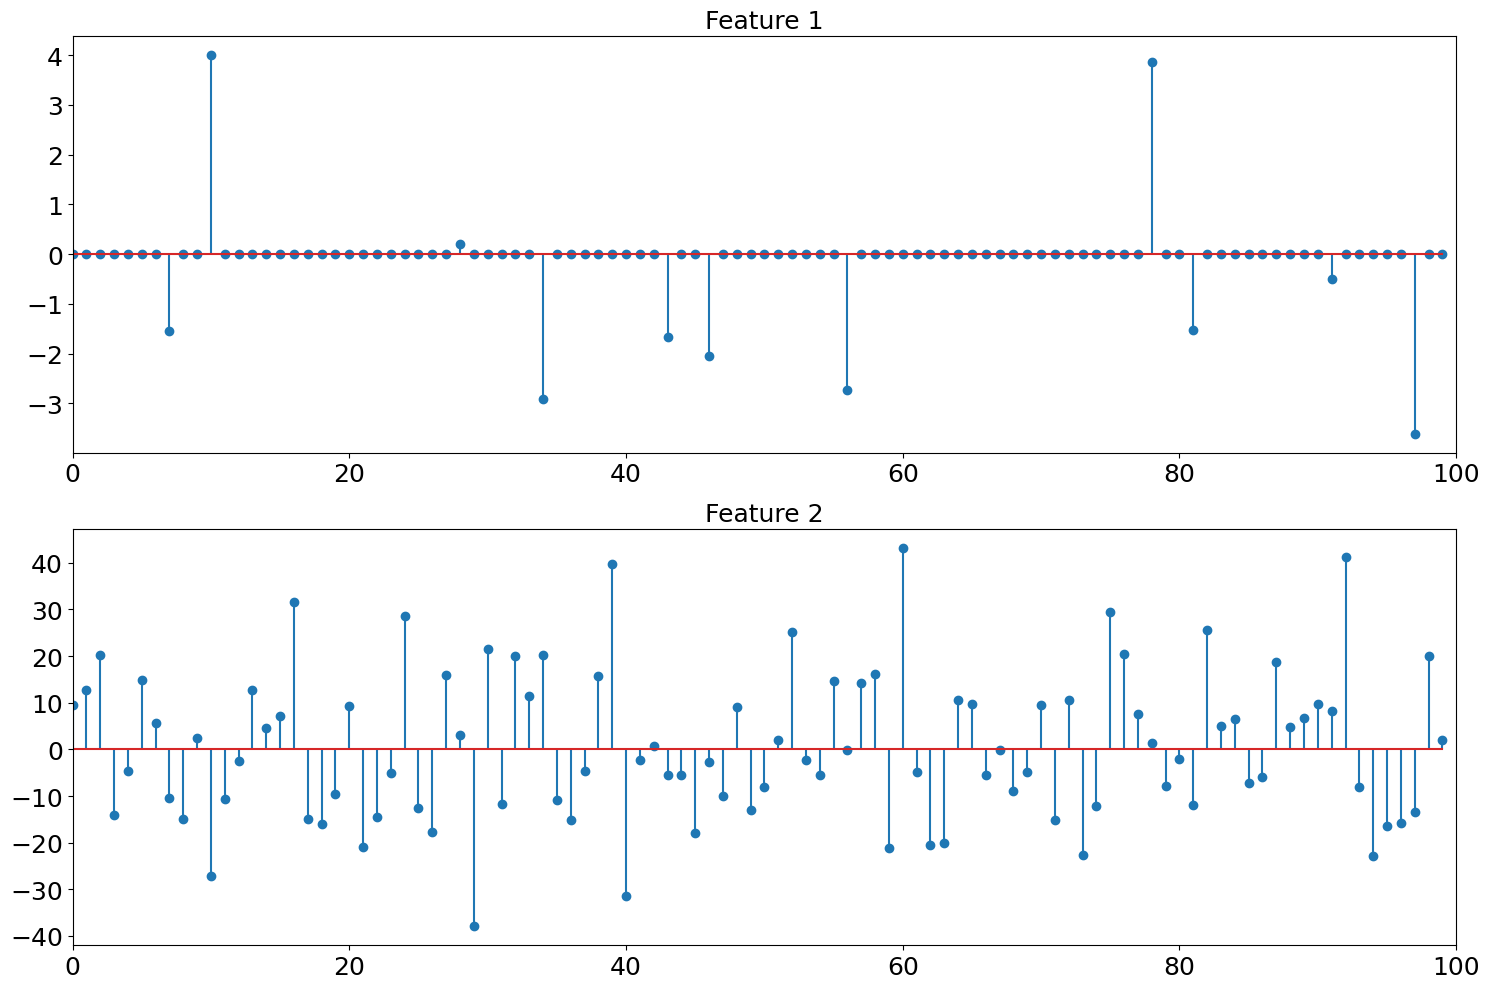

In [20]:


def generate_signal(signal_length, num_nonzero):
    """
    Generate a sparse signal with specified number of non-zero elements
    
    Parameters:
    signal_length (int): Length of the signal to generate
    num_nonzero (int): Number of non-zero elements to include
    
    Returns:
    numpy.ndarray: Generated sparse signal
    """
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Define parameters
signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no = 220325  # Enter your index no without english letters and without leading zeros

# Generate sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)

# Modify signal based on index number
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

# Scale the signal
sparse_signal = sparse_signal / 5

# Generate random noise for feature 2
epsilon = np.random.normal(0, 15, signal_length)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot Feature 1
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

# Plot Feature 2
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

In [21]:
import sklearn.preprocessing as sk

In [22]:
scaler_standard = sk.StandardScaler()
scaler_minmax= sk.MinMaxScaler()
scaler_maxabs = sk.MaxAbsScaler()

### Three scaled for Feature 1

In [23]:

sparse_signal_standard = scaler_standard.fit_transform(sparse_signal.reshape(-1, 1)).ravel()
sparse_signal_minmax = scaler_minmax.fit_transform(sparse_signal.reshape(-1, 1)).ravel()
sparse_signal_maxabs = scaler_maxabs.fit_transform(sparse_signal.reshape(-1, 1)).ravel()



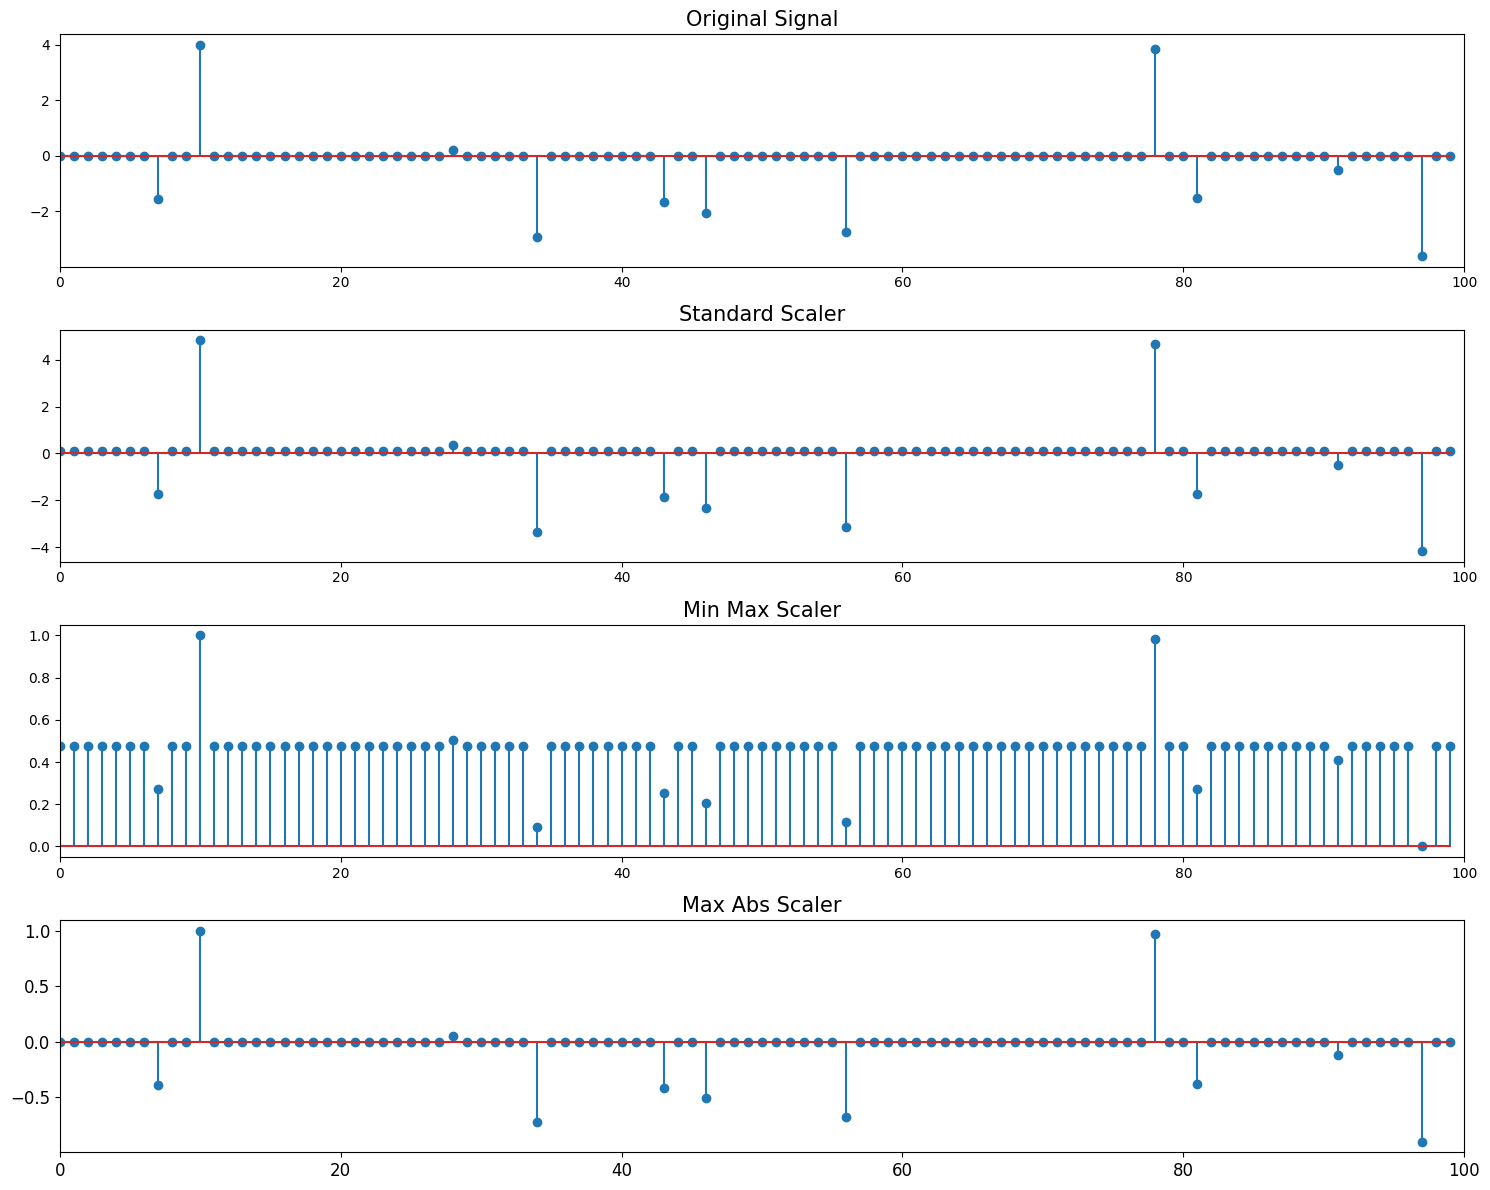

In [24]:
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.xlim(0, signal_length)
plt.title("Original Signal", fontsize=15)
plt.stem(sparse_signal)

plt.subplot(4, 1, 2)
plt.xlim(0, signal_length)
plt.title("Standard Scaler", fontsize=15)
plt.stem(sparse_signal_standard)


plt.subplot(4, 1, 3)
plt.xlim(0, signal_length)
plt.title("Min Max Scaler", fontsize=15)
plt.stem(sparse_signal_minmax)

plt.subplot(4, 1, 4)
plt.xlim(0, signal_length)
plt.title("Max Abs Scaler", fontsize=15)
plt.stem(sparse_signal_maxabs)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

feature 2

In [25]:
epsilon_standard = scaler_standard.fit_transform(epsilon.reshape(-1, 1)).ravel()
epsilon_minmax = scaler_minmax.fit_transform(epsilon.reshape(-1, 1)).ravel()
epsilon_maxabs = scaler_maxabs.fit_transform(epsilon.reshape(-1, 1)).ravel()

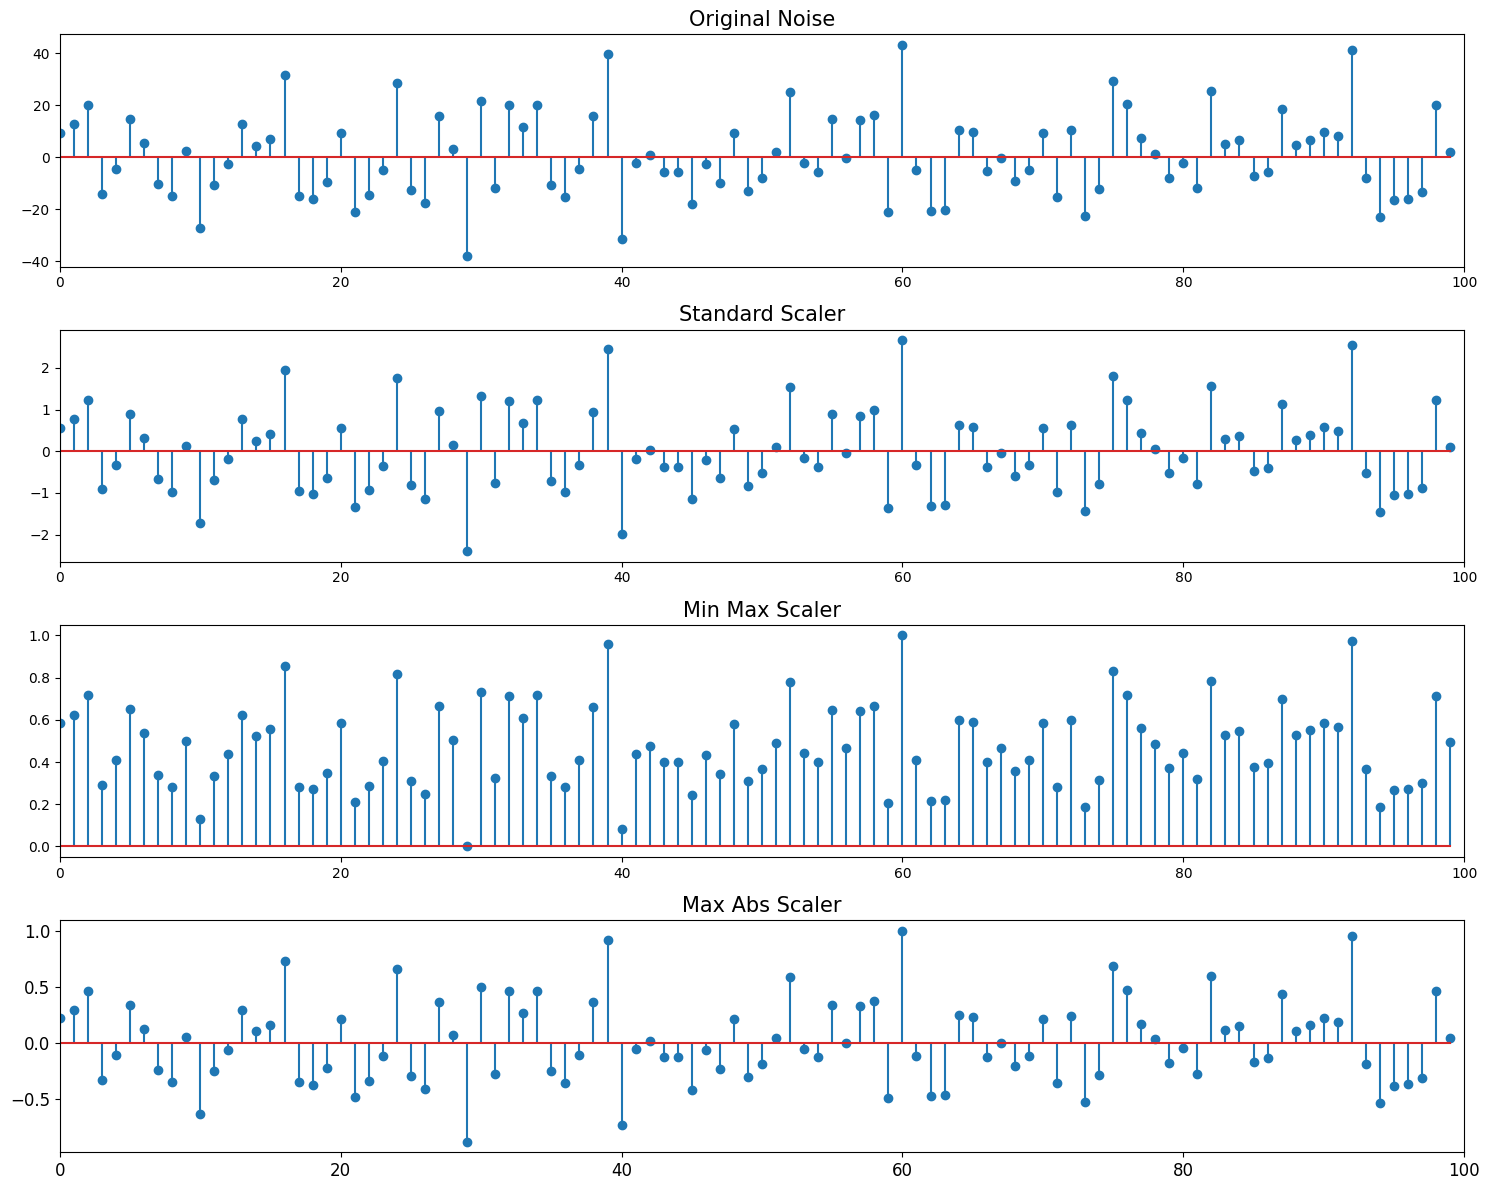

In [29]:
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.xlim(0, signal_length)
plt.title("Original Noise", fontsize=15)
plt.stem(epsilon)


plt.subplot(4, 1, 2)
plt.xlim(0, signal_length)
plt.title("Standard Scaler", fontsize=15)
plt.stem(epsilon_standard)


plt.subplot(4, 1, 3)
plt.xlim(0, signal_length)
plt.title("Min Max Scaler", fontsize=15)
plt.stem(epsilon_minmax)

plt.subplot(4, 1, 4)
plt.xlim(0, signal_length)
plt.title("Max Abs Scaler", fontsize=15)
plt.stem(epsilon_maxabs)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()